<a href="https://colab.research.google.com/github/shubh25-sy/Predictive-Maintenance-in-Solar-Power-System/blob/main/SolarPower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated dataset with a clear pattern
np.random.seed(42)
# Generate non-maintenance data
data_normal = pd.DataFrame({
    "Temperature": np.random.normal(35, 5, 350),
    "Voltage": np.random.normal(220, 10, 350),
    "Current": np.random.normal(10, 2, 350),
    "Humidity": np.random.normal(50, 10, 350),
    "Maintenance_Required": 0
})

# Generate maintenance data with higher temperature and current
data_maintenance = pd.DataFrame({
    "Temperature": np.random.normal(45, 5, 150),
    "Voltage": np.random.normal(220, 10, 150),
    "Current": np.random.normal(15, 2, 150),
    "Humidity": np.random.normal(50, 10, 150),
    "Maintenance_Required": 1
})

# Concatenate the two dataframes
df = pd.concat([data_normal, data_maintenance], ignore_index=True)
df.head()

,Temperature,Voltage,Current,Humidity,Maintenance_Required
0,37.483571,223.109076,8.954554,43.744373,0
1,34.308678,234.753562,12.098018,53.958035,0
2,38.238443,228.576596,8.591313,54.940302,0
3,42.615149,218.400615,7.183077,52.606738,0
4,33.829233,219.809838,6.886742,44.496948,0


--- Logistic Regression ---
Model Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.55      0.63        71
           1       0.32      0.52      0.39        29

    accuracy                           0.54       100
   macro avg       0.53      0.53      0.51       100
weighted avg       0.62      0.54      0.56       100



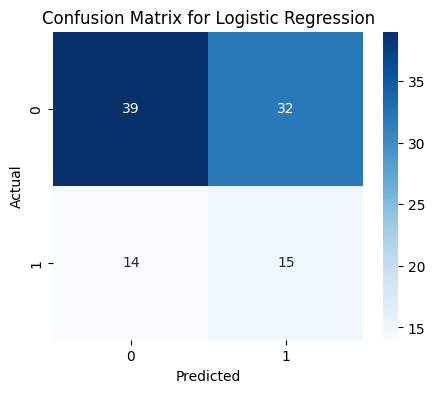

--- Random Forest ---
Model Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78        71
           1       0.11      0.03      0.05        29

    accuracy                           0.64       100
   macro avg       0.40      0.46      0.42       100
weighted avg       0.52      0.64      0.57       100



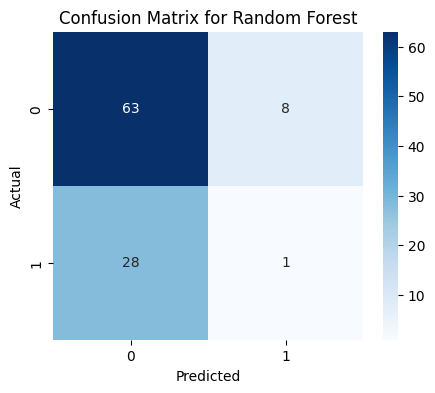

--- XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:32:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.76      0.72        71
           1       0.15      0.10      0.12        29

    accuracy                           0.57       100
   macro avg       0.41      0.43      0.42       100
weighted avg       0.52      0.57      0.54       100



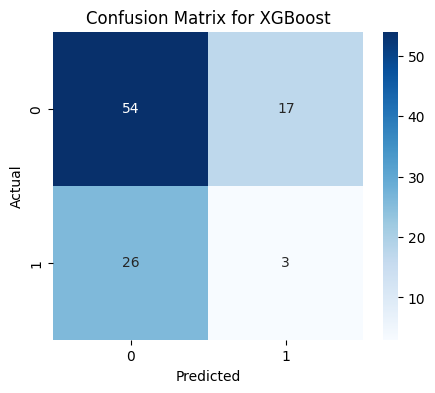

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated dataset
np.random.seed(42)
data = {
    "Temperature": np.random.uniform(25, 50, 500),
    "Voltage": np.random.uniform(200, 500, 500),
    "Current": np.random.uniform(5, 20, 500),
    "Humidity": np.random.uniform(20, 80, 500),
    "Maintenance_Required": np.random.choice([0, 1], 500, p=[0.7, 0.3])
}

df = pd.DataFrame(data)

# Normalize features
scaler = MinMaxScaler()
normalized_features = ["Temperature", "Voltage", "Current", "Humidity"]
df[normalized_features] = scaler.fit_transform(df[normalized_features])

# Split dataset
X = df.drop(columns=["Maintenance_Required"])
y = df["Maintenance_Required"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Model Training and Evaluation ---
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy and report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

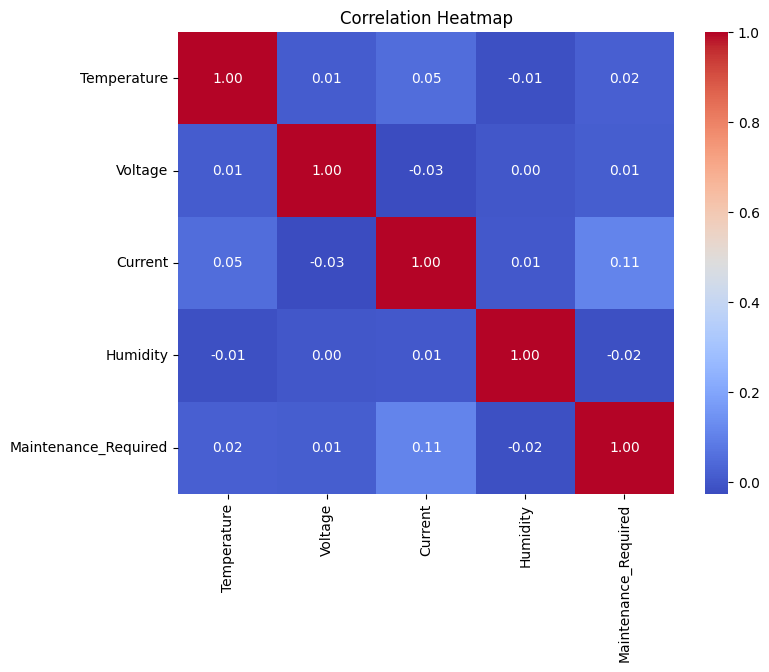

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


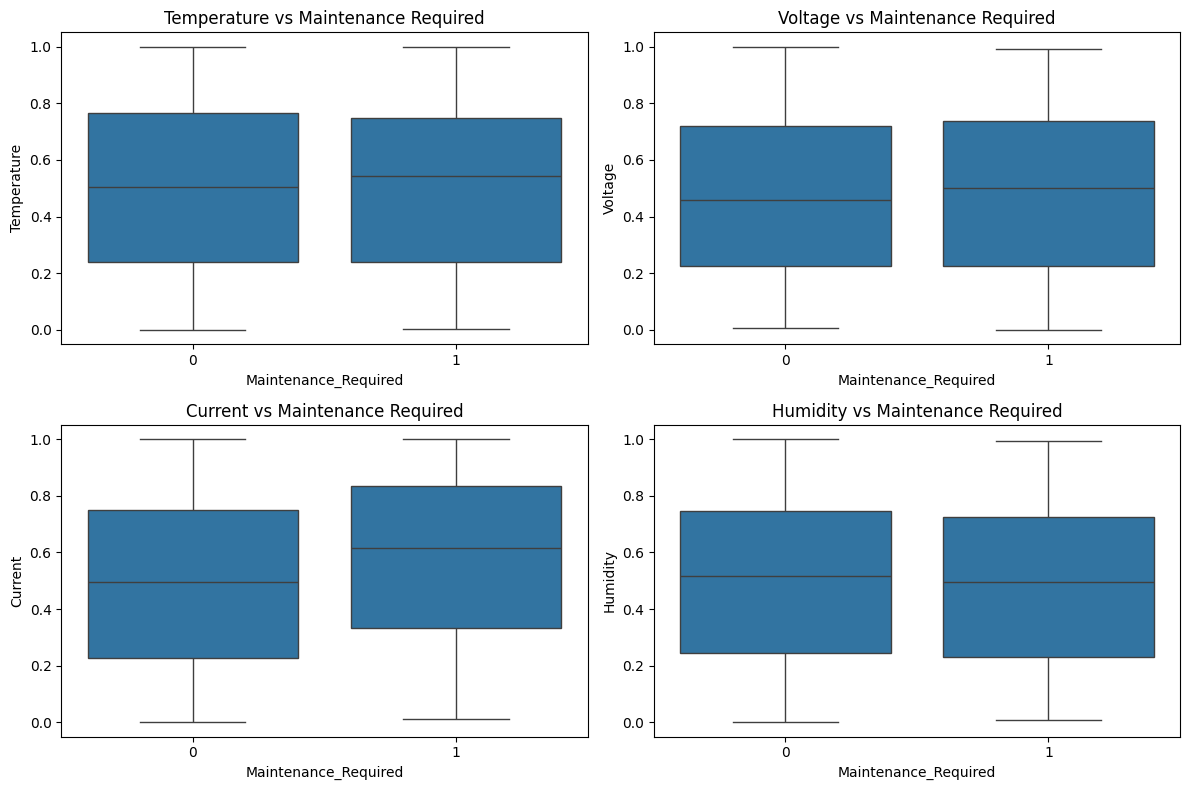

In [ ]:
# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Temperature vs Maintenance
sns.boxplot(x="Maintenance_Required", y="Temperature", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Temperature vs Maintenance Required")

# Voltage vs Maintenance
sns.boxplot(x="Maintenance_Required", y="Voltage", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Voltage vs Maintenance Required")

# Current vs Maintenance
sns.boxplot(x="Maintenance_Required", y="Current", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Current vs Maintenance Required")

# Humidity vs Maintenance
sns.boxplot(x="Maintenance_Required", y="Humidity", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Humidity vs Maintenance Required")

# Adjust layout
plt.tight_layout()
plt.show()


✅ Final Model Accuracy: 0.63

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.97      0.77        64
           1       0.33      0.03      0.05        36

    accuracy                           0.63       100
   macro avg       0.49      0.50      0.41       100
weighted avg       0.53      0.63      0.51       100



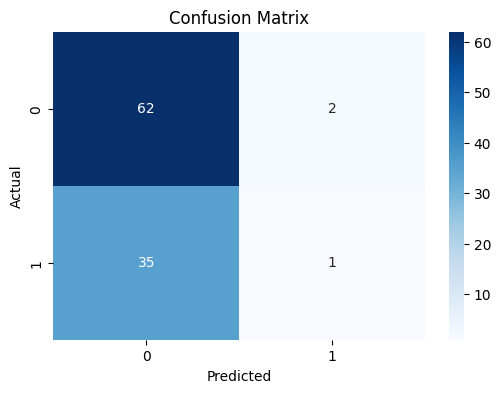

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Simulate dataset
np.random.seed(42)
data = {
    "Temperature": np.random.uniform(25, 50, 500),
    "Voltage": np.random.uniform(200, 500, 500),
    "Current": np.random.uniform(5, 20, 500),
    "Humidity": np.random.uniform(20, 80, 500),
    "Maintenance_Required": np.random.choice([0, 1], 500, p=[0.7, 0.3])
}
df = pd.DataFrame(data)

# 2. Normalize features
scaler = MinMaxScaler()
features = ["Temperature", "Voltage", "Current", "Humidity"]
df[features] = scaler.fit_transform(df[features])

# 3. Split data
X = df.drop(columns=["Maintenance_Required"])
y = df["Maintenance_Required"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Random Forest with class_weight='balanced'
model = RandomForestClassifier(n_estimators=150, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 5. Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Final Model Accuracy: {accuracy:.2f}")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# 6. Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
